# Análisis predictivo

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas.

In [ ]:
# carga de datos
import time
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

Cargamos todas las librerias necesarias para nuestro estudio

In [ ]:
# machine learning
from feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.utils import resample,shuffle

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# Carga de Datos

En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab una vez listos desde la etapa anterior.

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
df = pd.read_excel("/content/Terrorismo_limpio_organizaciones_importantes.xlsx")

In [ ]:
data_1="Terrorismo_limpio_organizaciones_importantes"
df = pd.read_excel(data_1 + ".xlsx", header=0, parse_dates=False, index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10973 entries, 11 to 12
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   day                  10973 non-null  int64         
 1   país_txt             10973 non-null  object        
 2   región_txt           10973 non-null  object        
 3   ciudad               10973 non-null  object        
 4   latitud              10973 non-null  int64         
 5   longitud             10973 non-null  int64         
 6   crit                 10973 non-null  int64         
 7   multiple             10973 non-null  int64         
 8   éxito                10973 non-null  int64         
 9   suicidio             10973 non-null  int64         
 10  tipodeataque_txt     10973 non-null  object        
 11  tipoobjetivo         10973 non-null  object        
 12  nacionalidadvictima  10973 non-null  object        
 13  organizacion         10973 non-nu

In [ ]:
from numpy.core.multiarray import concatenate
d = df[df['región_txt']=='Sub-Saharan Africa']
d.reset_index()

,month,day,país_txt,región_txt,ciudad,latitud,longitud,crit,multiple,éxito,...,tipoarmamento,muertos,muertosterroristas,heridos,secuestrovictima,rescate,sumario,motivo,bajas,fecha
0,11,30,South Africa,Sub-Saharan Africa,Unknown,-25476646,30978892,1,0,1,...,Explosives,2,0,0,0,0,nada que aportar,nada que aportar,2,1976-11-30
1,2,24,South Africa,Sub-Saharan Africa,Daveyton,-26141151,28427501,1,0,1,...,Explosives,0,0,0,0,0,nada que aportar,nada que aportar,0,1977-02-24
2,7,15,South Africa,Sub-Saharan Africa,Durban,-29861824,31008293,1,0,1,...,Unknown,0,0,0,0,0,nada que aportar,nada que aportar,0,1977-07-15
3,7,26,South Africa,Sub-Saharan Africa,Vosloorus,-26355773,28208044,1,0,0,...,Unknown,1,1,0,0,0,nada que aportar,nada que aportar,1,1977-07-26
4,7,26,South Africa,Sub-Saharan Africa,Dobsonville,-26252697,27870275,1,0,1,...,Unknown,1,1,2,0,0,nada que aportar,nada que aportar,3,1977-07-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10968,12,28,Democratic Republic of the Congo,Sub-Saharan Africa,Beni,495944,29459606,1,0,1,...,Explosives,0,0,3,0,0,nada que aportar,nada que aportar,3,2019-12-28
10969,12,29,Niger,Sub-Saharan Africa,Komabangou,13691111,1282778,1,0,1,...,Firearms,2,1,0,0,0,nada que aportar,nada que aportar,2,2019-12-29
10970,12,29,Nigeria,Sub-Saharan Africa,Mandaragirau,10697343,12332069,1,0,1,...,Firearms,1,0,0,1,0,nada que aportar,nada que aportar,1,2019-12-29
10971,12,29,Democratic Republic of the Congo,Sub-Saharan Africa,Apetina-Sana,470486,293138,1,0,1,...,Incendiary,18,0,0,-9,0,nada que aportar,nada que aportar,1,2019-12-29


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10973 entries, 11 to 12
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   day                  10973 non-null  int64         
 1   país_txt             10973 non-null  object        
 2   región_txt           10973 non-null  object        
 3   ciudad               10973 non-null  object        
 4   latitud              10973 non-null  int64         
 5   longitud             10973 non-null  int64         
 6   crit                 10973 non-null  int64         
 7   multiple             10973 non-null  int64         
 8   éxito                10973 non-null  int64         
 9   suicidio             10973 non-null  int64         
 10  tipodeataque_txt     10973 non-null  object        
 11  tipoobjetivo         10973 non-null  object        
 12  nacionalidadvictima  10973 non-null  object        
 13  organizacion         10973 non-nu

In [ ]:
d.drop(['muertos','day', 'longitud', 'latitud','país_txt','región_txt','tipodeataque_txt','motivo','sumario','ciudad','nacionalidadvictima','heridos'], axis=1, inplace = True)

In [ ]:
d.drop(['fecha'], axis=1, inplace = True)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10973 entries, 11 to 12
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   crit                10973 non-null  int64 
 1   multiple            10973 non-null  int64 
 2   éxito               10973 non-null  int64 
 3   suicidio            10973 non-null  int64 
 4   tipoobjetivo        10973 non-null  object
 5   organizacion        10973 non-null  object
 6   tipoarmamento       10973 non-null  object
 7   muertosterroristas  10973 non-null  int64 
 8   secuestrovictima    10973 non-null  int64 
 9   rescate             10973 non-null  int64 
 10  bajas               10973 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.0+ MB


In [ ]:
print("Original features:\n", list(d.columns), "\n")
d_dummies = pd.get_dummies(d)
print("Features after get_dummies:\n", list(d_dummies.columns))

Original features:
 ['crit', 'multiple', 'éxito', 'suicidio', 'tipoobjetivo', 'organizacion', 'tipoarmamento', 'muertosterroristas', 'secuestrovictima', 'rescate', 'bajas'] 

Features after get_dummies:
 ['crit', 'multiple', 'éxito', 'suicidio', 'muertosterroristas', 'secuestrovictima', 'rescate', 'bajas', 'tipoobjetivo_Airports & Aircraft', 'tipoobjetivo_Business', 'tipoobjetivo_Educational Institution', 'tipoobjetivo_Food or Water Supply', 'tipoobjetivo_Government (Diplomatic)', 'tipoobjetivo_Government (General)', 'tipoobjetivo_Journalists & Media', 'tipoobjetivo_Maritime', 'tipoobjetivo_Military', 'tipoobjetivo_NGO', 'tipoobjetivo_Other', 'tipoobjetivo_Police', 'tipoobjetivo_Private Citizens & Property', 'tipoobjetivo_Religious Figures/Institutions', 'tipoobjetivo_Telecommunication', 'tipoobjetivo_Terrorists/Non-State Militia', 'tipoobjetivo_Tourists', 'tipoobjetivo_Transportation', 'tipoobjetivo_Unknown', 'tipoobjetivo_Utilities', 'tipoobjetivo_Violent Political Party', 'organizac

In [ ]:
d_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10973 entries, 11 to 12
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ADF                10973 non-null  uint8
 1   ANC                10973 non-null  uint8
 2   Al-Shabaab         10973 non-null  uint8
 3   Boko Haram         10973 non-null  uint8
 4   Fulani extremists  10973 non-null  uint8
 5   Hutu extremists    10973 non-null  uint8
 6   JNIM               10973 non-null  uint8
 7   LRA                10973 non-null  uint8
 8   MNR                10973 non-null  uint8
 9   Mayi Mayi          10973 non-null  uint8
 10  Muslim extremists  10973 non-null  uint8
 11  SPLM-IO            10973 non-null  uint8
 12  Separatists        10973 non-null  uint8
 13  UNITA              10973 non-null  uint8
dtypes: uint8(14)
memory usage: 235.7 KB


In [ ]:
df2 = d_dummies.drop(['tipoobjetivo_Other' , 'tipoobjetivo_Unknown', 'tipoarmamento_Other'] , axis=1)
df1 = d.tipoarmamento

In [ ]:
df2 = df.drop(['organizacion','crit','rescate' , 'tipoobjetivo', 'tipoarmamento', 'motivo','sumario'] , axis=1)
df1 = df.tipoarmamento

In [ ]:
#method to parse and plot sklearn confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

In [ ]:
from sklearn.model_selection import train_test_split

def get_min_required_rows(test_size=0.2):
    return 1 / test_size

def make_stratified_splits(df, y_col="label", test_size=0.2):
    """
        for any class with rows less than min_required_rows corresponding to the input test_size,
        all the rows associated with the specific class will have a copy in both the train and test splits.

        example: if test_size is 0.2 (20% otherwise),
        min_required_rows = 5 (which is obtained from 1 / test_size i.e., 1 / 0.2)
        where the resulting splits will have 4 train rows (80%), 1 test row (20%)..
    """

    id_col = "id"
    temp_col = "same-class-rows"

    class_to_counts = df[y_col].value_counts()
    df[temp_col] = df[y_col].apply(lambda y: class_to_counts[y])

    min_required_rows = get_min_required_rows(test_size)
    copy_rows = df[df[temp_col] < min_required_rows].copy(deep=True)
    valid_rows = df[df[temp_col] >= min_required_rows].copy(deep=True)

    X = valid_rows[id_col].tolist()
    y = valid_rows[y_col].tolist()

    # notice, this train_test_split is a stratified split
    X_train, X_test, _, _ = train_test_split(X, y, test_size=test_size, random_state=43, stratify=y)

    X_test = X_test + copy_rows[id_col].tolist()
    X_train = X_train + copy_rows[id_col].tolist()

    df.drop([temp_col], axis=1, inplace=True)

    test_df = df[df[id_col].isin(X_test)].copy(deep=True)
    train_df = df[df[id_col].isin(X_train)].copy(deep=True)

    print (f"number of rows in the original dataset: {len(df)}")

    test_prop = round(len(test_df) / len(df) * 100, 2)
    train_prop = round(len(train_df) / len(df) * 100, 2)
    print (f"number of rows in the splits: {len(train_df)} ({train_prop}%), {len(test_df)} ({test_prop}%)")

    return train_df, test_df

In [ ]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
# libraries for EDA
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#libraries for Data Preprocessing
import pandas as pd
import numpy as np
import scipy as sc
import itertools

#libraries for Data Mining - Classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

#library for plotting crimes on Asia map
from mpl_toolkits.basemap import Basemap

#library to suppress warnings
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [ ]:
#Stratified sampling of dataset
X = df2
Y = df1
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=1/3, random_state=85)
expected = ytest
#Lable encoding of objects -> numeric_objects
le=LabelEncoder()
for col in xtest.columns.values:
    if xtest[col].dtypes=='object':
       data=xtrain[col].append(xtest[col])
       le.fit(data.values)
       xtrain[col]=le.transform(xtrain[col])
       xtest[col]=le.transform(xtest[col])

In [ ]:
#encoded numerical data
xtrain.head()

,crit,multiple,éxito,suicidio,muertosterroristas,secuestrovictima,rescate,bajas,tipoobjetivo_Airports & Aircraft,tipoobjetivo_Business,...,organizacion_SPLM-IO,organizacion_Separatists,organizacion_UNITA,tipoarmamento_Chemical,tipoarmamento_Explosives,tipoarmamento_Firearms,tipoarmamento_Incendiary,tipoarmamento_Melee,tipoarmamento_Sabotage Equipment,tipoarmamento_Unknown
month,,,,,,,,,,,,,,,,,,,,,
4,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
11,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,1,1,0,0,0,0,2,0,1,...,0,0,0,0,1,0,0,0,0,0


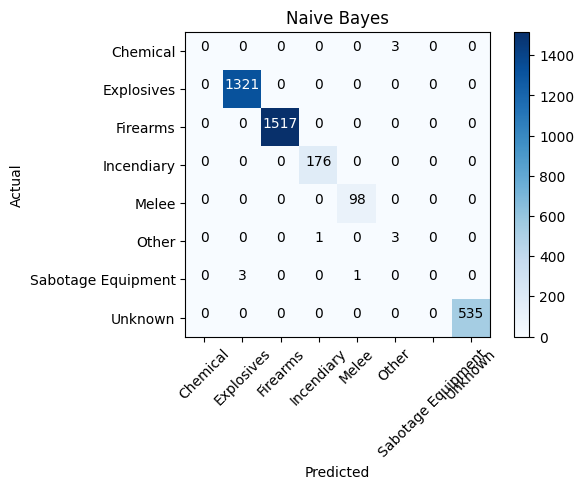

In [ ]:
#Train Gaussian Naive Bayes model and get performance measures
model1 = GaussianNB()
model1.fit(xtrain, ytrain)
predicted1 = model1.predict(xtest)

cr1 = metrics.classification_report(expected, predicted1)
cm1 = metrics.confusion_matrix(expected, predicted1)

fs1 = f1_score(expected, predicted1, average="macro")
ps1 = precision_score(expected, predicted1, average="macro")
rs1 = recall_score(expected, predicted1, average="macro")
as1 = accuracy_score(expected, predicted1)

plt.figure()
plot_confusion_matrix(cm1, classes=model1.classes_, title='Naive Bayes')

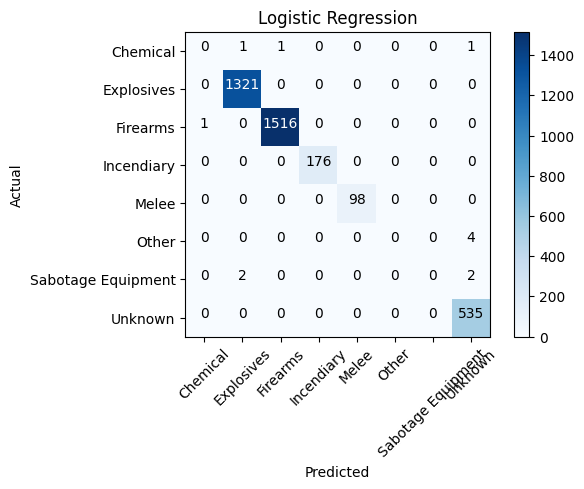

In [ ]:
#Train Logistic regression model and get performance measures
model2 = LogisticRegression()
model2.fit(xtrain, ytrain)
predicted2 = model2.predict(xtest)

cr2 = metrics.classification_report(expected, predicted2)
cm2 = metrics.confusion_matrix(expected, predicted2)

fs2 = f1_score(expected, predicted2, average="macro")
ps2 = precision_score(expected, predicted2, average="macro")
rs2 = recall_score(expected, predicted2, average="macro")
as2 = accuracy_score(expected, predicted2)
plt.figure()
plot_confusion_matrix(cm2, classes=model2.classes_, title='Logistic Regression')

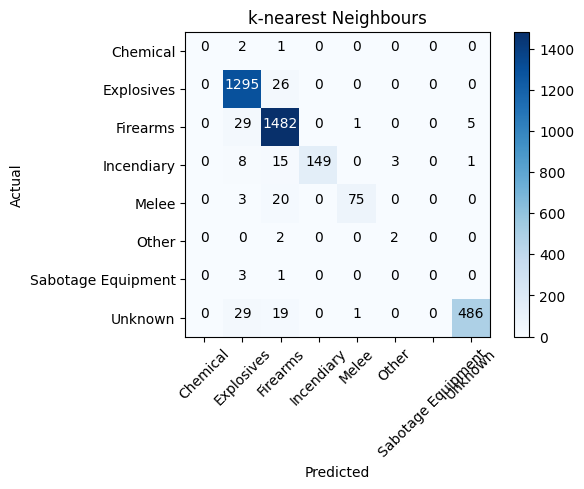

In [ ]:
#Train kNN model and get performance measures
model3 = KNeighborsClassifier()
model3.fit(xtrain, ytrain)
predicted3 = model3.predict(xtest)

cr3 = metrics.classification_report(expected, predicted3)
cm3 = metrics.confusion_matrix(expected, predicted3)

fs3 = f1_score(expected, predicted3, average="macro")
ps3 = precision_score(expected, predicted3, average="macro")
rs3 = recall_score(expected, predicted3, average="macro")
as3 = accuracy_score(expected, predicted3)
plt.figure()
plot_confusion_matrix(cm3, classes=model3.classes_, title='k-nearest Neighbours')

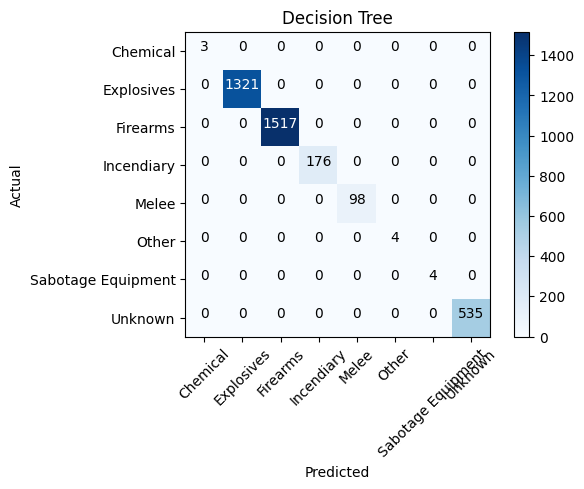

In [ ]:
#Train Decision Tree model and get performance measures
model4 = DecisionTreeClassifier()
model4.fit(xtrain, ytrain)
predicted4 = model4.predict(xtest)

cr4 = metrics.classification_report(expected, predicted4)
cm4 = metrics.confusion_matrix(expected, predicted4)

fs4 = f1_score(expected, predicted4, average="macro")
ps4 = precision_score(expected, predicted4, average="macro")
rs4 = recall_score(expected, predicted4, average="macro")
as4 = accuracy_score(expected, predicted4)
plt.figure()
plot_confusion_matrix(cm4, classes=model4.classes_, title='Decision Tree')

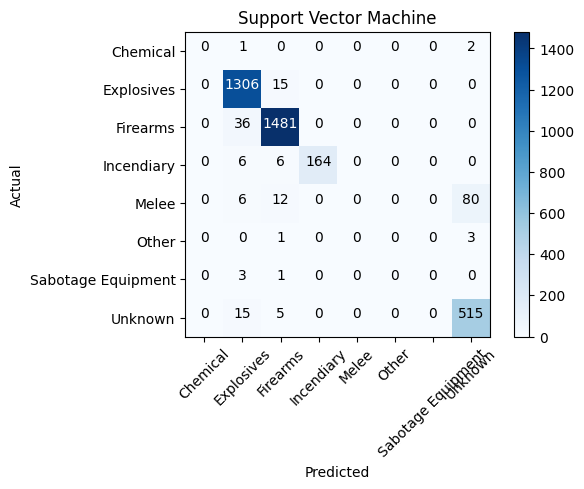

In [ ]:
#Train Support Vector Machine model and get performance measures
model5 = SVC()
model5.fit(xtrain, ytrain)
predicted5 = model5.predict(xtest)

cr5 = metrics.classification_report(expected, predicted5)
cm5 = metrics.confusion_matrix(expected, predicted5)

fs5 = f1_score(expected, predicted5, average="macro")
ps5 = precision_score(expected, predicted5, average="macro")
rs5 = recall_score(expected, predicted5, average="macro")
as5 = accuracy_score(expected, predicted5)
plt.figure()
plot_confusion_matrix(cm5, classes=model5.classes_, title='Support Vector Machine')

In [ ]:
#dictionaries for performance measure of all 5 models
acc_scores = pd.Series([as1, as2, as3, as4, as5])
pre_scores = pd.Series([ps1, ps2, ps3, ps4, ps5])
rec_scores = pd.Series([rs1, rs2, rs3, rs4, rs5])
f1_scores = pd.Series([fs1, fs2, fs3, fs4, fs5])
labels = ['Naive Bayes', 'Logistic Regression', 'kNN', 'Decision Tree', 'SVM']

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

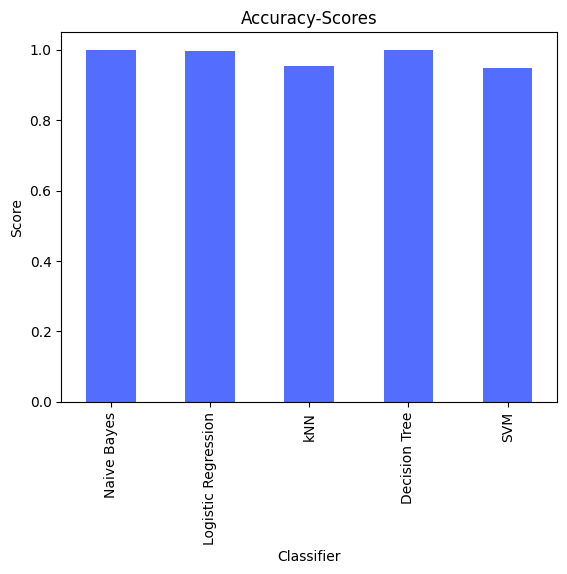

In [ ]:
#Accuracy Score Comparison
plt9 = acc_scores.plot(kind='bar', color = '#536dfe')
plt9.set(title = "Accuracy-Scores", xlabel = "Classifier", ylabel = "Score")
plt9.set_xticklabels(labels)

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

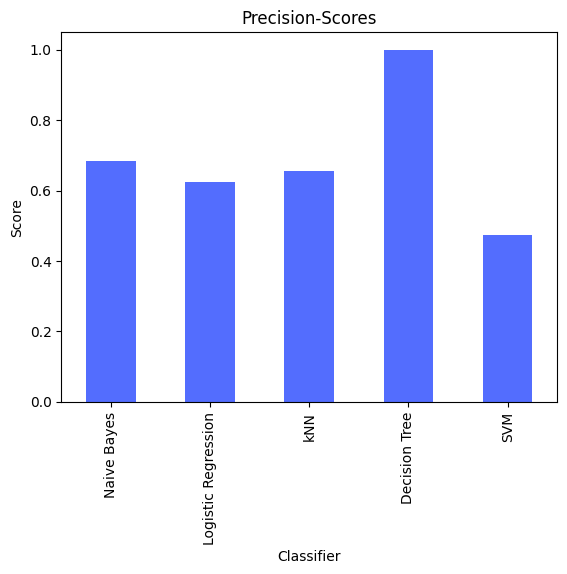

In [ ]:
#Precision Score Comparison
plt10 = pre_scores.plot(kind='bar', color = '#536dfe')
plt10.set(title = "Precision-Scores", xlabel = "Classifier", ylabel = "Score")
plt10.set_xticklabels(labels)

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

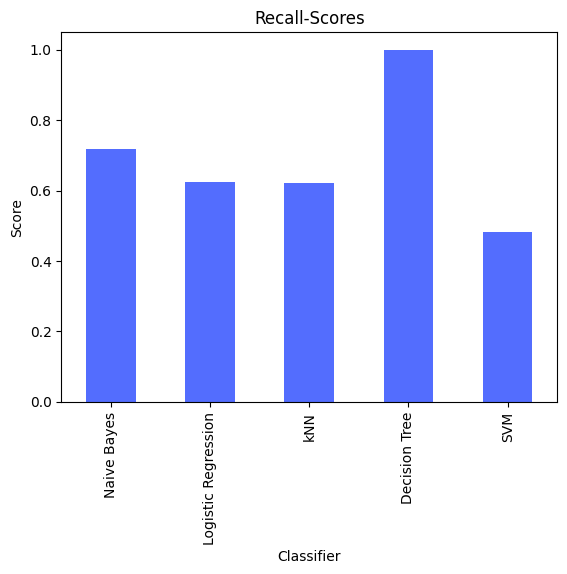

In [ ]:
#Recall Score Comparison
plt11 = rec_scores.plot(kind='bar', color = '#536dfe')
plt11.set(title = "Recall-Scores", xlabel = "Classifier", ylabel = "Score")
plt11.set_xticklabels(labels)

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

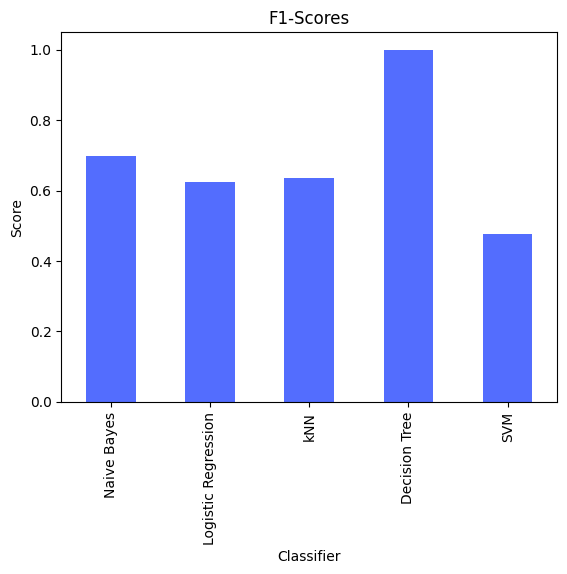

In [ ]:
#F1-Score Comparison
plt12 = f1_scores.plot(kind='bar', color = '#536dfe')
plt12.set(title = "F1-Scores", xlabel = "Classifier", ylabel = "Score")
plt12.set_xticklabels(labels)

In [ ]:
table=pd.DataFrame({"Accuracy":[as1, as2, as3, as4, as5],
                    "Recall":[rs1, rs2, rs3, rs4, rs5],
                    "Precision ":[ps1, ps2, ps3, ps4, ps5],
                   "f1_scores ":[fs1, fs2, fs3, fs4, fs5]},
                   index=['Naive Bayes', 'Logistic Regression', 'kNN', 'Decision Tree', 'SVM'])
table